In [1]:
import pandas as pd, numpy as np, requests, os, matplotlib.pyplot as plt, seaborn as sns

from pathlib import Path

In [2]:

#~ setting up project directories 

PROJECT_ROOT = Path.cwd().resolve().parents[0]

DATA_DIR = PROJECT_ROOT / 'data' 

RAW_DIR = DATA_DIR / 'raw'

PROCESSED_DIR = DATA_DIR / 'processed'

In [3]:

#~ reading model_df dataframe

model_df = pd.read_parquet(PROCESSED_DIR/'model_df.parquet')

#~ quick overview

display(model_df.shape)
display(model_df.head())
display(model_df.tail())

(5435021, 23)

,startstationname,starttime_hourly,total_demand,arrondissement,temperature,precipitation,wind_speed,latitude,longitude,hour,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,feels_like_temp,is_raining,lag_1h,lag_24h,rolling_3h,rolling_24h
0,10e avenue / Masson,2023-04-13 17:00:00,17,Rosemont - La Petite-Patrie,22.1,0.0,9.0,45.550306,-73.573353,17,...,-0.965926,-2.588190e-01,0.433884,-0.900969,15.8,0,8.0,2.0,9.333333,4.583333
1,10e avenue / Masson,2023-04-13 18:00:00,14,Rosemont - La Petite-Patrie,23.9,0.0,9.0,45.550306,-73.573353,18,...,-1.000000,-1.836970e-16,0.433884,-0.900969,17.6,0,17.0,1.0,11.666667,5.208333
2,10e avenue / Masson,2023-04-13 19:00:00,3,Rosemont - La Petite-Patrie,25.9,0.0,7.0,45.550306,-73.573353,19,...,-0.965926,2.588190e-01,0.433884,-0.900969,21.0,0,14.0,1.0,13.000000,5.750000
3,10e avenue / Masson,2023-04-13 20:00:00,10,Rosemont - La Petite-Patrie,26.7,0.0,6.0,45.550306,-73.573353,20,...,-0.866025,5.000000e-01,0.433884,-0.900969,22.5,0,3.0,3.0,11.333333,5.833333
4,10e avenue / Masson,2023-04-13 21:00:00,6,Rosemont - La Petite-Patrie,27.0,0.0,7.0,45.550306,-73.573353,21,...,-0.707107,7.071068e-01,0.433884,-0.900969,22.1,0,10.0,4.0,9.000000,6.125000


,startstationname,starttime_hourly,total_demand,arrondissement,temperature,precipitation,wind_speed,latitude,longitude,hour,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,feels_like_temp,is_raining,lag_1h,lag_24h,rolling_3h,rolling_24h
5435016,Émile-Journault / de Châteaubriand,2024-11-18 15:00:00,1,Ahuntsic-Cartierville,7.4,0.0,7.0,45.549712,-73.640691,15,...,-0.707107,-7.071068e-01,0.0,1.0,2.5,0,2.0,1.0,1.333333,1.416667
5435017,Émile-Journault / de Châteaubriand,2024-11-18 16:00:00,1,Ahuntsic-Cartierville,8.9,0.0,6.0,45.549712,-73.640691,16,...,-0.866025,-5.000000e-01,0.0,1.0,4.7,0,1.0,2.0,1.333333,1.416667
5435018,Émile-Journault / de Châteaubriand,2024-11-18 17:00:00,1,Ahuntsic-Cartierville,8.8,0.0,0.0,45.549712,-73.640691,17,...,-0.965926,-2.588190e-01,0.0,1.0,8.8,0,1.0,2.0,1.333333,1.375000
5435019,Émile-Journault / de Châteaubriand,2024-11-18 18:00:00,3,Ahuntsic-Cartierville,9.1,0.0,4.0,45.549712,-73.640691,18,...,-1.000000,-1.836970e-16,0.0,1.0,6.3,0,1.0,1.0,1.000000,1.333333
5435020,Émile-Journault / de Châteaubriand,2024-11-18 20:00:00,1,Ahuntsic-Cartierville,9.9,0.0,0.0,45.549712,-73.640691,20,...,-0.866025,5.000000e-01,0.0,1.0,9.9,0,3.0,1.0,1.666667,1.416667


In [4]:
model_df.columns.tolist()


['startstationname',
 'starttime_hourly',
 'total_demand',
 'arrondissement',
 'temperature',
 'precipitation',
 'wind_speed',
 'latitude',
 'longitude',
 'hour',
 'day_of_week',
 'is_weekend',
 'month',
 'hour_sin',
 'hour_cos',
 'day_of_week_sin',
 'day_of_week_cos',
 'feels_like_temp',
 'is_raining',
 'lag_1h',
 'lag_24h',
 'rolling_3h',
 'rolling_24h']

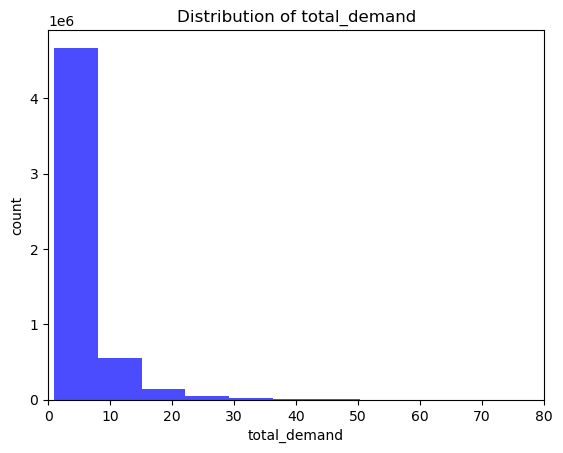

In [5]:

#~ histogram of target variable total_demand

plt.figure()
plt.hist(model_df["total_demand"], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of total_demand")
plt.xlabel("total_demand")
plt.ylabel("count")
plt.xlim(0,80)
plt.show()


Time Structure Validation (hour/day/month patterns)

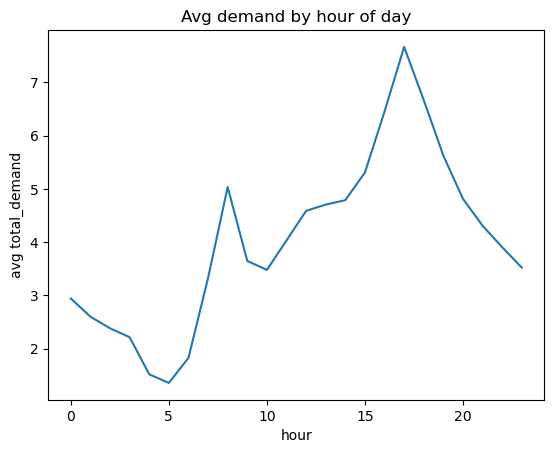

In [6]:

#~ hour profile of total_demand

hour_profile = model_df.groupby("hour")["total_demand"].mean().reset_index()

plt.figure()
plt.plot(hour_profile["hour"], hour_profile["total_demand"])
plt.title("Avg demand by hour of day")
plt.xlabel("hour")
plt.ylabel("avg total_demand")
plt.show()


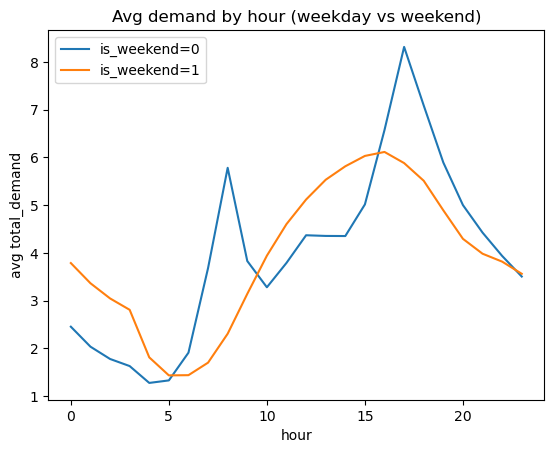

In [7]:

#~ weekday vs weekend by hour

hour_weekend = model_df.groupby(["hour", "is_weekend"])["total_demand"].mean().reset_index()

plt.figure()
for w in sorted(hour_weekend["is_weekend"].unique()):
    sub = hour_weekend[hour_weekend["is_weekend"] == w]
    plt.plot(sub["hour"], sub["total_demand"], label=f"is_weekend={w}")
plt.title("Avg demand by hour (weekday vs weekend)")
plt.xlabel("hour")
plt.ylabel("avg total_demand")
plt.legend()
plt.show()


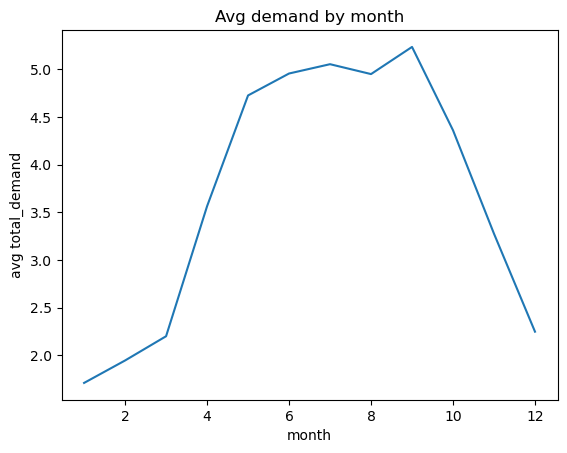

In [8]:

#~ month profile of total_demand

month_profile = model_df.groupby("month")["total_demand"].mean().reset_index()

plt.figure()
plt.plot(month_profile["month"], month_profile["total_demand"])
plt.title("Avg demand by month")
plt.xlabel("month")
plt.ylabel("avg total_demand")
plt.show()


In [9]:

#~ correlation of lag features with total_demand

lag_cols = ["lag_1h", "lag_24h", "rolling_3h", "rolling_24h"]
corrs = model_df[["total_demand"] + lag_cols].corr()["total_demand"].sort_values(ascending=False)
print("Correlation with total_demand:")
display(corrs)


Correlation with total_demand:


total_demand    1.000000
lag_1h          0.666168
rolling_3h      0.640611
rolling_24h     0.575266
lag_24h         0.397549
Name: total_demand, dtype: float64

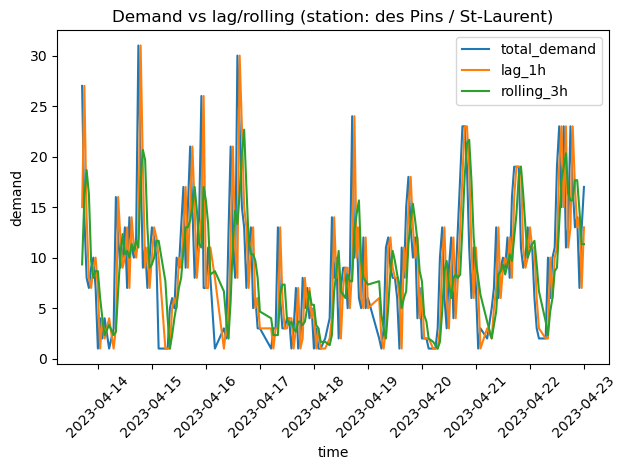

In [10]:

#~ checking one station for the lag features validation

top_station = model_df["startstationname"].value_counts().index[0]
one = model_df[model_df["startstationname"] == top_station].sort_values("starttime_hourly").head(200)

plt.figure()
plt.plot(one["starttime_hourly"], one["total_demand"], label="total_demand")
plt.plot(one["starttime_hourly"], one["lag_1h"], label="lag_1h")
plt.plot(one["starttime_hourly"], one["rolling_3h"], label="rolling_3h")
plt.title(f"Demand vs lag/rolling (station: {top_station})")
plt.xlabel("time")
plt.ylabel("demand")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\calvi\AppData\Local\Temp\ipykernel_25568\1105600011.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_bin = model_df.groupby("temp_bin")["total_demand"].mean().reset_index()


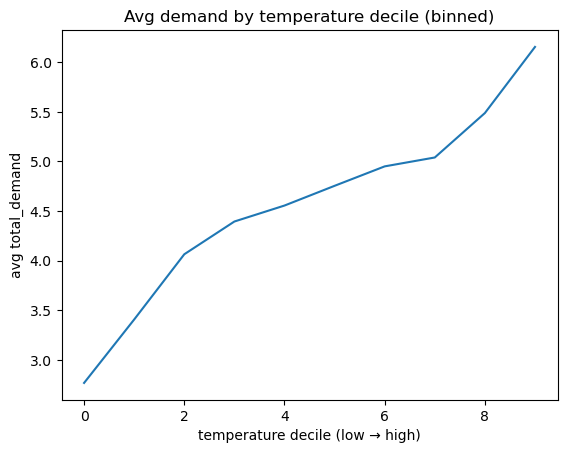

In [11]:

#~ avg demand by temperature decile (binned)

model_df["temp_bin"] = pd.qcut(model_df["temperature"], q=10, duplicates="drop")
temp_bin = model_df.groupby("temp_bin")["total_demand"].mean().reset_index()

plt.figure()
plt.plot(range(len(temp_bin)), temp_bin["total_demand"])
plt.title("Avg demand by temperature decile (binned)")
plt.xlabel("temperature decile (low → high)")
plt.ylabel("avg total_demand")
plt.show()


,mean,median,count
is_raining,,,
0,4.645239,3.0,5019504
1,3.427881,2.0,415517


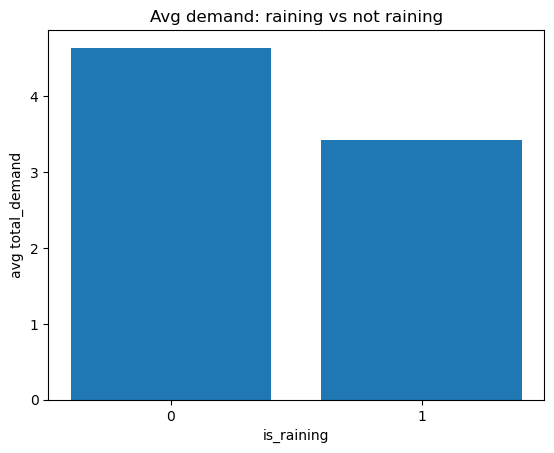

In [12]:

#~ comparing demand when raining vs not raining

rain_comp = model_df.groupby("is_raining")["total_demand"].agg(["mean", "median", "count"])
display(rain_comp)

plt.figure()
plt.bar(rain_comp.index.astype(str), rain_comp["mean"])
plt.title("Avg demand: raining vs not raining")
plt.xlabel("is_raining")
plt.ylabel("avg total_demand")
plt.show()


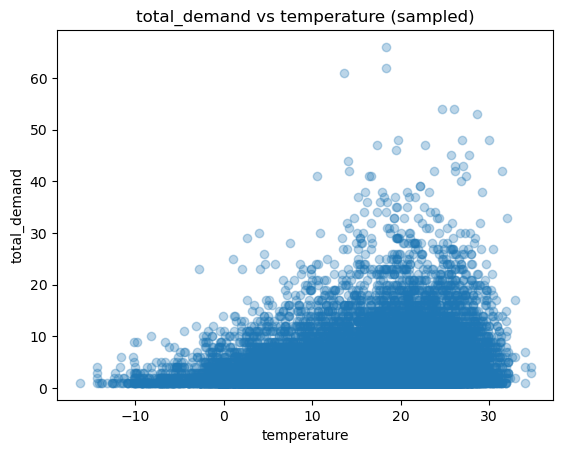

In [13]:

#~ scatterplot to check demand vs temperature

sample = model_df.sample(min(len(model_df), 20000), random_state=42)  
plt.figure()
plt.scatter(sample["temperature"], sample["total_demand"], alpha=0.3)
plt.title("total_demand vs temperature (sampled)")
plt.xlabel("temperature")
plt.ylabel("total_demand")
plt.show()


C:\Users\calvi\AppData\Local\Temp\ipykernel_25568\1821665080.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_totals = model_df.groupby("startstationname")["total_demand"].sum().sort_values(ascending=False)


startstationname
du Mont-Royal / Clark                             183963
Métro Mont-Royal (Utilités publiques / Rivard)    158005
Marquette / du Mont-Royal                         152322
des Pins / St-Laurent                             148595
Métro Atwater (Atwater / Ste-Catherine)           133749
Laurier / St-Denis                                122516
Boyer / du Mont-Royal                             118982
Métro Peel (de Maisonneuve / Stanley)             117031
Laurier / de Brébeuf                              111898
McTavish / Sherbrooke                             111112
Prince-Arthur / du Parc                           105192
Berri / Rachel                                    104602
Berri / Cherrier                                  104208
Clark / Prince-Arthur                             103662
de la Commune / Place Jacques-Cartier             103551
Mackay / de Maisonneuve                           101184
Métro Sherbrooke (de Rigaud / Berri)               98699
Métro Beaubien

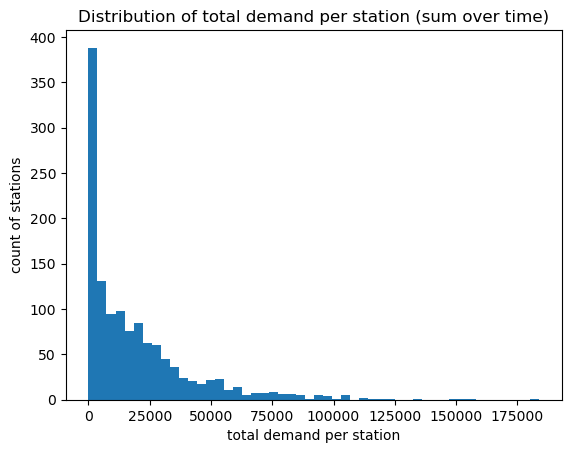

In [14]:

#~ checking top 20 stations by total demand

station_totals = model_df.groupby("startstationname")["total_demand"].sum().sort_values(ascending=False)
display(station_totals.head(20))

plt.figure()
plt.hist(station_totals.values, bins=50)
plt.title("Distribution of total demand per station (sum over time)")
plt.xlabel("total demand per station")
plt.ylabel("count of stations")
plt.show()



C:\Users\calvi\AppData\Local\Temp\ipykernel_25568\2699112788.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arr_totals = model_df.groupby("arrondissement")["total_demand"].sum().sort_values(ascending=False)


arrondissement
Le Plateau-Mont-Royal                       8434116
Ville-Marie                                 6187822
Rosemont - La Petite-Patrie                 3106317
Le Sud-Ouest                                1715984
Mercier - Hochelaga-Maisonneuve             1002892
Côte-des-Neiges - Notre-Dame-de-Grâce        957887
Villeray—Saint-Michel—Parc-Extension         656387
Verdun                                       575520
Villeray - Saint-Michel - Parc-Extension     574852
Outremont                                    399193
Ahuntsic-Cartierville                        354090
Westmount                                    200875
LaSalle                                      102435
Saint-Laurent                                 85911
Lachine                                       71629
Longueuil                                     67954
Mont-Royal                                    60790
Laval                                         57025
Saint-Léonard                                 534

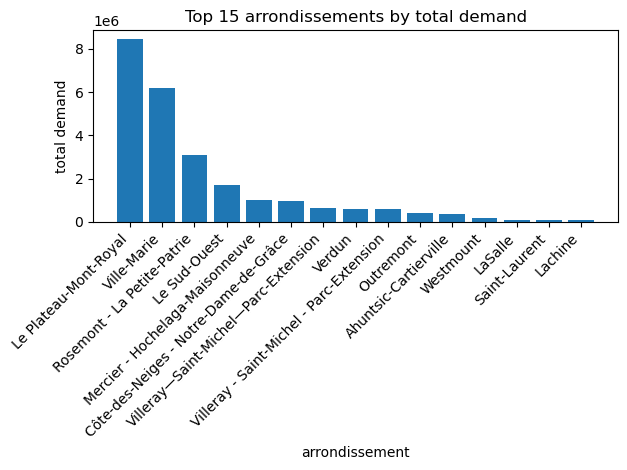

In [15]:

#~ checking top demand by arondissement

arr_totals = model_df.groupby("arrondissement")["total_demand"].sum().sort_values(ascending=False)
display(arr_totals.head(20))

plt.figure()
plt.bar(arr_totals.head(15).index.astype(str), arr_totals.head(15).values)
plt.title("Top 15 arrondissements by total demand")
plt.xlabel("arrondissement")
plt.ylabel("total demand")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [16]:

#~ correlation matrix for numerical features

num_cols = [
    "total_demand","temperature","precipitation","wind_speed","latitude","longitude",
    "hour","day_of_week","month","hour_sin","hour_cos","day_of_week_sin","day_of_week_cos",
    "feels_like_temp","is_raining","lag_1h","lag_24h","rolling_3h","rolling_24h"
]
corr = model_df[num_cols].corr()

target_corr = corr["total_demand"].sort_values(ascending=False)
print("Correlation with total_demand:")
display(target_corr)


Correlation with total_demand:


total_demand       1.000000
lag_1h             0.666168
rolling_3h         0.640611
rolling_24h        0.575266
lag_24h            0.397549
temperature        0.188033
hour               0.170636
feels_like_temp    0.166414
longitude          0.029181
day_of_week_sin    0.019724
day_of_week       -0.005033
month             -0.007142
wind_speed        -0.009931
precipitation     -0.023409
latitude          -0.028580
day_of_week_cos   -0.032213
is_raining        -0.065180
hour_cos          -0.080586
hour_sin          -0.222901
Name: total_demand, dtype: float64